# FIT1043

## Assignment 2

Name: Joshua Lim Boon Hor
Student ID: 32633122

## 1. Assignment Introduction

### 1.a. Introduction

Section 1 of the assignemnt focuses on analysing the data retrieved from the essay features csv file and providing some description of said data.

### 1.a1. Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score as cks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import seaborn as sns
import numpy as np



### 1.a2. Reading the file

In [ ]:
features = pd.read_csv('FIT1043-Essay-Features.csv')

.shape will show how many rows and columns there are in the dataset respectively.

In [ ]:
features.shape

(1332, 19)

(1332, 19)

### 1.b. Datatypes in features

In [ ]:
features.dtypes

essayid                        int64
chars                          int64
words                          int64
commas                         int64
apostrophes                    int64
punctuations                   int64
avg_word_length              float64
sentences                      int64
questions                      int64
avg_word_sentence            float64
POS                          float64
POS/total_words              float64
prompt_words                   int64
prompt_words/total_words     float64
synonym_words                  int64
synonym_words/total_words    float64
unstemmed                      int64
stemmed                        int64
score                          int64
dtype: object

essayid                        int64
chars                          int64
words                          int64
commas                         int64
apostrophes                    int64
punctuations                   int64
avg_word_length              float64
sentences                      int64
questions                      int64
avg_word_sentence            float64
POS                          float64
POS/total_words              float64
prompt_words                   int64
prompt_words/total_words     float64
synonym_words                  int64
synonym_words/total_words    float64
unstemmed                      int64
stemmed                        int64
score                          int64
dtype: object

#### A small test to see if the values have been read correctly.

In [ ]:
features.tail()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3
1331,1077,2806,542,24,6,0,5.177122,22,3,24.636364,538.988889,0.994444,284,0.523985,155,0.285978,596,575,4


,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3
1331,1077,2806,542,24,6,0,5.177122,22,3,24.636364,538.988889,0.994444,284,0.523985,155,0.285978,596,575,4


In [ ]:
features.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [ ]:
features.sample(5)

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
1157,1075,1870,371,21,3,0,5.040431,22,0,16.863636,367.324251,0.990092,192,0.517520,94,0.253369,404,389,4
419,1499,2275,466,4,11,0,4.881974,19,2,24.526316,459.317426,0.985660,246,0.527897,120,0.257511,510,489,3
1218,416,2697,512,22,15,0,5.267578,28,2,18.285714,507.649673,0.991503,266,0.519531,135,0.263672,582,567,3
1240,750,2238,436,9,2,1,5.133028,20,0,21.800000,432.660494,0.992341,193,0.442661,107,0.245413,557,547,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3


,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
1157,1075,1870,371,21,3,0,5.040431,22,0,16.863636,367.324251,0.990092,192,0.517520,94,0.253369,404,389,4
419,1499,2275,466,4,11,0,4.881974,19,2,24.526316,459.317426,0.985660,246,0.527897,120,0.257511,510,489,3
1218,416,2697,512,22,15,0,5.267578,28,2,18.285714,507.649673,0.991503,266,0.519531,135,0.263672,582,567,3
1240,750,2238,436,9,2,1,5.133028,20,0,21.800000,432.660494,0.992341,193,0.442661,107,0.245413,557,547,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3


## 2. Supervised Learning

### 2.a. Supervised Machine Learning, The Notion of Labelled Data and Training and Testing datasets


Supervised learning is when we must create a predictive model based on the given output and input data. There are 2 proportions of data the higher proportion, that is used for training purposes, and the lower proportion, which is used for testing purposes. Later, the data retrieved from training is used to create a predictive model, which is then used to make predictions that are then compared with the test data.

### 2.b.  Separating the features and the labels 


The label being used here is "score" as instructed by the question.

In [ ]:
x = features.iloc[:,np.r_[1:5,7:9,13:18]].values #feature data
y = features.iloc[:,18].values #labelled data

### 2.c. Splitting training and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 0)

## 3. Classification

### 3.a Explaining the difference between binary and multi-class classification.

Binary classification are tasks where examples are assigned to exactly one of two classes. Whereas, Multi-class classificatioin are tasks when examples are assigned exactly one of more than two classes. Here we can see that we are doing Multi-class Classification. 

### 3.b In preparation for Support Vector Machine/Regression, your data should be normalised/scaled.


### 3.bi. Feature Scaling or Normalization

Since we have a range of values that varies widely, in some machine learning algorithms,
objective functions will cease to work properly without feature scaling (also known as normalization). For
example, many people who classify, calculate the distance between two points using its Euclidean
distance. If one of the features had a broader range of values, the distance would be influenced greatly by this particular feature. Therefore, by normalizing the features, we are able to ensure that each feature contributes proportionately to the final distance.  

### 3.bii. 

In [ ]:
# Scaling the features
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

### 3.c Using the SVM algorithm to build the model

### 3.ci. Describing SVM in relation to Linear Regression 

First of all before i start describing SVM in relation to Linear regression, I must first explain what SVM and Linear regression are respectively. 

The main point i would like to highlight is; 

Linear regression: gives explicit decisions
SVM: finds an approximate of real decisions because of computational solutions.

So, if SVM and Linear regression have this key difference how can they be used in relation? 
An SVM is a supervised algorithm that is used for both classification and regression tasks. It can solve linear and non-linear problems and work well for many practical problems. The algorithm basically creates a line or a hyperplane that will seperate the data into classes.

### 3.cii. Explaining the kernel in SVM/SVR

The main function of the kernel is to transform a given datasets input data into the required form. The types include, polynomial, radial basis and linear functions. Polynomial and RBF are useful for non-linear planes. Usually, the computational cost increases as the dimension of data increases which would occur when we required to move to a higher dimension but are unable to find a seperating hyperplane. However, A kernel reduces computational cost by helping find a hyperplane in the higher dimensional space without the need to increase computational cost. 

### 3.ciii. Building the model using the training dataset

In [ ]:
#Creating a svm classifier
clf = svm.SVC(kernel = 'linear') #linear kernel

In [ ]:
#train the model using the training sets
clf.fit(x_train, y_train)

SVC(kernel='linear')

SVC(kernel='linear')

### 3.d. Predict

### 3.di. Using the dataset in 2.ciii. we are conducting the prediction for the score label. 

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([4, 3, 3, 2, 3, 4, 4, 4, 2, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3,
       3, 3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4,
       4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 3, 2,
       4, 4, 3, 4, 3, 3, 1, 3, 3, 4, 3, 2, 4, 3, 3, 4, 4, 2, 4, 4, 4, 4,
       2, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4,
       4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 2, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 4,
       3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3,
       4, 4, 4, 4, 4, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 3, 2, 2, 2, 3, 3, 4, 3,
       3, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 4, 4, 2, 3, 4, 3,
       3, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3,

array([4, 3, 3, 2, 3, 4, 4, 4, 2, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3,
       3, 3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4,
       4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 3, 2,
       4, 4, 3, 4, 3, 3, 1, 3, 3, 4, 3, 2, 4, 3, 3, 4, 4, 2, 4, 4, 4, 4,
       2, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4,
       4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 2, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 4,
       3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3,
       4, 4, 4, 4, 4, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 3, 2, 2, 2, 3, 3, 4, 3,
       3, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 4, 4, 2, 3, 4, 3,
       3, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3,

In [ ]:
y_test

array([4, 4, 3, 2, 3, 4, 4, 4, 2, 4, 5, 3, 6, 4, 4, 5, 3, 3, 4, 4, 2, 3,
       4, 2, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 5, 3, 3, 4, 3, 4, 3, 2, 4, 3,
       3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 5, 4,
       4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3,
       4, 3, 3, 4, 3, 3, 2, 3, 3, 4, 3, 2, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4,
       2, 3, 2, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 5, 3, 3, 4, 3, 4, 4, 5, 4,
       3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 2, 3, 3, 4, 4, 4, 3, 4, 4,
       4, 2, 2, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4,
       3, 4, 4, 2, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 2, 4, 3, 3, 1, 3, 4, 4,
       3, 4, 3, 3, 3, 3, 5, 4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3,
       4, 5, 4, 4, 4, 4, 2, 4, 3, 3, 3, 3, 5, 3, 4, 4, 3, 4, 4, 4, 5, 4,
       2, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2,
       3, 4, 4, 3, 5, 3, 3, 4, 2, 4, 3, 3, 3, 4, 4, 3, 5, 4, 2, 3, 4, 3,
       3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 5, 3, 4,

array([4, 4, 3, 2, 3, 4, 4, 4, 2, 4, 5, 3, 6, 4, 4, 5, 3, 3, 4, 4, 2, 3,
       4, 2, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 5, 3, 3, 4, 3, 4, 3, 2, 4, 3,
       3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 5, 4,
       4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3,
       4, 3, 3, 4, 3, 3, 2, 3, 3, 4, 3, 2, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4,
       2, 3, 2, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 5, 3, 3, 4, 3, 4, 4, 5, 4,
       3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 2, 3, 3, 4, 4, 4, 3, 4, 4,
       4, 2, 2, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4,
       3, 4, 4, 2, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 2, 4, 3, 3, 1, 3, 4, 4,
       3, 4, 3, 3, 3, 3, 5, 4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3,
       4, 5, 4, 4, 4, 4, 2, 4, 3, 3, 3, 3, 5, 3, 4, 4, 3, 4, 4, 4, 5, 4,
       2, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2,
       3, 4, 4, 3, 5, 3, 3, 4, 2, 4, 3, 3, 3, 4, 4, 3, 5, 4, 2, 3, 4, 3,
       3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 5, 3, 4,

#### 3.dii. Displaying the confusion matrix. 

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
matrix


array([[  0,   2,   0,   0,   0,   0],
       [  1,  12,  14,   0,   0,   0],
       [  0,   3, 125,  41,   0,   0],
       [  0,   0,  47, 133,   0,   0],
       [  0,   0,   1,  20,   0,   0],
       [  0,   0,   0,   1,   0,   0]], dtype=int64)

array([[  0,   2,   0,   0,   0,   0],
       [  1,  12,  14,   0,   0,   0],
       [  0,   3, 125,  41,   0,   0],
       [  0,   0,  47, 133,   0,   0],
       [  0,   0,   1,  20,   0,   0],
       [  0,   0,   0,   1,   0,   0]], dtype=int64)

In [ ]:
#creating a dataframe for an array-formatted confusion matrix, so it will be easier to decypher. 
df = pd.DataFrame(matrix,
                    columns = [0,1,2,3,4,5],
                    index = [0,1,2,3,4,5]
                     )


<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

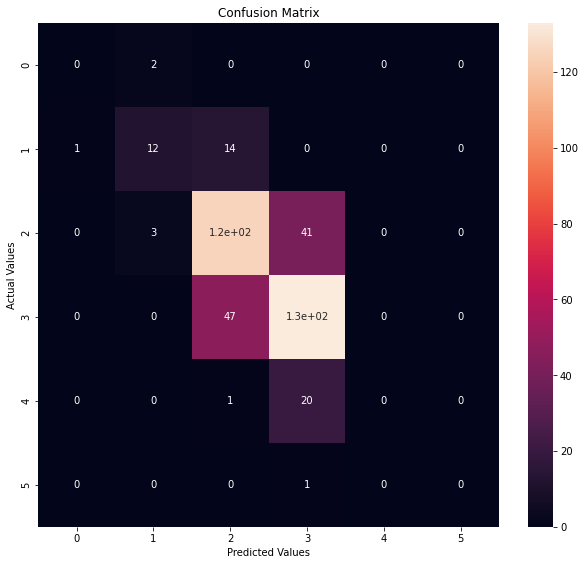

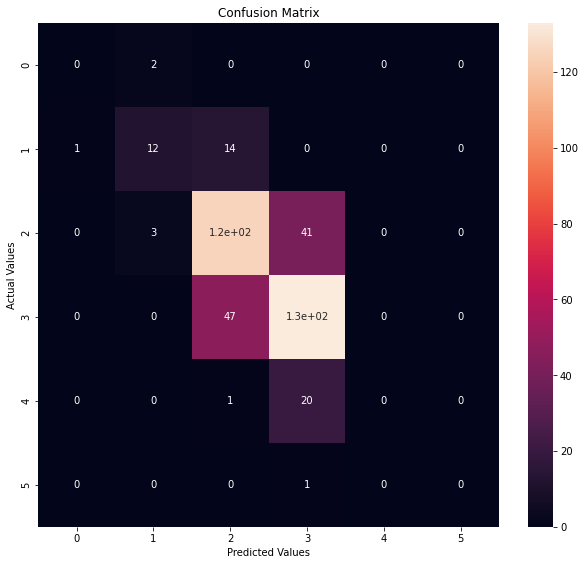

In [ ]:
#plotting the confusion matrix
plt.figure(figsize = (8,7))
sns.heatmap(matrix, annot = True)

plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.subplots_adjust(left=5, bottom=5, right=6, top=6, wspace=2, hspace=3)
plt.show

A confusion matrix is used to know the performance of a machine learning classification. It gives us a comparison between Actual and predicted values. It is a matrix in the form of an N x N matrix, where N is the number of classes or outputs.
For 4 classes, we get 4 x 4 confusion matrix and so on. The confusion matrix uses 4 terms to find percission, accuracy and etc. These terms are as follows, True Positive (TP), False Positive(FP), True Negative(TN), and False Negative(FN).  

Example of said terms based on our matrix is as follows: 



For class 1,

TP: The actual value and predicted value are equal, so TP = 12

FN: The sum of values of corresponding rows except the TP value 
    FN = 15
    
FP: The sum of values of corresponding columns except for the TP Value
    FP = 5
    
TN: The sum of all columns and rows except the values of that class we are calculating for. 
    TN = 368

Accuracy = (TP + TN) / (TP + TN + FP + FN ) = 95%

Precision = (TP/(TP+FP)) = 70.59%

In [ ]:
accuracy_score(y_test,y_pred)

0.675

0.675

Our accuracy for this model is 67.5%.

### 3.diii. Explaining Quadratic Weighted Kappa (QWK) 


Submissions are scored based on the quadratic weighted kappa, which measures the agreement between two ratings. This metric typically varies from 0 (random agreement between raters) to 1 (complete agreement between raters). In the event that there is less agreement between the raters than expected by chance, the metric may go below 0. The quadratic weighted kappa is calculated between the scores which are expected/known and the predicted scores.

Results have 5 possible ratings, 0,1,2,3,4. The quadratic weighted kappa is calculated as follows. First, an N x N histogram matrix O is constructed, such that Oi,j corresponds to the number of adoption records that have a rating of i (actual) and received a predicted rating j. An N-by-N matrix of weights, w, is calculated based on the difference between actual and predicted rating scores.

An N-by-N histogram matrix of expected ratings, E, is calculated, assuming that there is no correlation between rating scores. This is calculated as the outer product between the actual rating's histogram vector of ratings and the predicted rating's histogram vector of ratings, normalized such that E and O have the same sum.

From these three matrices, the quadratic weighted kappa is calculated.

### 3.div. Obtaining QWK


### Weighted Matrix


An N-by-N matrix of weights, w, is calculated based on the difference between actual and predicted rating scores.



In [ ]:
w = np.zeros((6,6)); w

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
for i in range(len(w)):
    for j in range(len(w)):
        w[i][j] = float(((i-j)**2)/16) #as per formula, for this competition, N=6

In [ ]:
w

array([[0.    , 0.0625, 0.25  , 0.5625, 1.    , 1.5625],
       [0.0625, 0.    , 0.0625, 0.25  , 0.5625, 1.    ],
       [0.25  , 0.0625, 0.    , 0.0625, 0.25  , 0.5625],
       [0.5625, 0.25  , 0.0625, 0.    , 0.0625, 0.25  ],
       [1.    , 0.5625, 0.25  , 0.0625, 0.    , 0.0625],
       [1.5625, 1.    , 0.5625, 0.25  , 0.0625, 0.    ]])

array([[0.    , 0.0625, 0.25  , 0.5625, 1.    , 1.5625],
       [0.0625, 0.    , 0.0625, 0.25  , 0.5625, 1.    ],
       [0.25  , 0.0625, 0.    , 0.0625, 0.25  , 0.5625],
       [0.5625, 0.25  , 0.0625, 0.    , 0.0625, 0.25  ],
       [1.    , 0.5625, 0.25  , 0.0625, 0.    , 0.0625],
       [1.5625, 1.    , 0.5625, 0.25  , 0.0625, 0.    ]])

### Histogram

In [ ]:
N=400
act_hist=np.zeros([N])
for item in y_test: 
    act_hist[item]+=1
    
pred_hist=np.zeros([N])
for item in y_pred: 
    pred_hist[item]+=1

print(f'Actuals value counts:{act_hist},\n Prediction value counts:{pred_hist}')

### Expected Value (Outer product of histograms)

Expected matrix is calculated as the outer product between the actual rating's histogram vector of ratings and the predicted rating's histogram vector of ratings

In [ ]:
E = np.outer(act_hist, pred_hist); E

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   2.,  34., ...,   0.,   0.,   0.],
       [  0.,  27., 459., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   2.,  34., ...,   0.,   0.,   0.],
       [  0.,  27., 459., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

### Normalise E and O matrix

In [ ]:
E = E/E.sum(); E.sum()

0.9999999999999999

0.9999999999999999

In [ ]:
matrix = matrix/matrix.sum(); matrix.sum()

1.0

1.0

### Calculate Weighted Kappa

In [ ]:
num=0
den=0
for i in range(len(w)):
    for j in range(len(w)):
        num+=w[i][j]*matrix[i][j]
        den+=w[i][j]*E[i][j]
 
weighted_kappa = (1 - (num/den)); weighted_kappa

0.6073676309255731

0.6073676309255731

A negative QWK score implies that the model is "worse than random". A random model should give a score of close to 0. Lastly, perfect predictions will yield a score of 1. Therefore our score of 0.6 is about 60% towards perfect predictions. which means more or less 40% of the time we will be getting a false prediction.

## Using the inbuilt method in sklearn to calculate QWK

In [ ]:
cks(y_pred, y_test, labels= None, weights = 'quadratic', sample_weight=None)

0.615036231884058

0.615036231884058

## Kaggle Submission prep

In [ ]:
submission = pd.read_csv('FIT1043-Essay-Features-Submission.csv') #reading file

In [ ]:
submission.head() #test

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607


,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607


In [ ]:
submission.tail() #test

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
194,1226,1208,242,8,8,0,4.991736,13,0,18.615385,237.327684,0.980693,135,0.557851,58,0.239669,244,242
195,862,4039,817,24,11,1,4.943696,47,2,17.382979,812.656033,0.994683,386,0.472460,210,0.257038,750,750
196,1562,2448,468,22,7,0,5.230769,22,0,21.272727,465.656652,0.994993,224,0.478632,101,0.215812,540,526
197,1336,1081,214,14,5,0,5.051402,11,0,19.454545,212.990566,0.995283,114,0.532710,63,0.294393,259,256
198,1171,2094,433,11,12,0,4.836028,19,0,22.789474,426.651090,0.985337,221,0.510393,121,0.279446,501,478


,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
194,1226,1208,242,8,8,0,4.991736,13,0,18.615385,237.327684,0.980693,135,0.557851,58,0.239669,244,242
195,862,4039,817,24,11,1,4.943696,47,2,17.382979,812.656033,0.994683,386,0.472460,210,0.257038,750,750
196,1562,2448,468,22,7,0,5.230769,22,0,21.272727,465.656652,0.994993,224,0.478632,101,0.215812,540,526
197,1336,1081,214,14,5,0,5.051402,11,0,19.454545,212.990566,0.995283,114,0.532710,63,0.294393,259,256
198,1171,2094,433,11,12,0,4.836028,19,0,22.789474,426.651090,0.985337,221,0.510393,121,0.279446,501,478


In [ ]:
X = submission.iloc[:,np.r_[1:5,7:9,13:18]].values #feature data

In [ ]:
# Scaling the features
scale = StandardScaler()
X = scale.fit_transform(X)


In [ ]:
X.size


2189

2189

In [ ]:
X_trained = clf.predict(X) #training the data

In [ ]:
X_trained.size 


199

199

In [ ]:
my_submission = pd.DataFrame({'essayid':submission["essayid"],'score': X_trained})

In [ ]:
DataFrame = my_submission.to_csv('32633122-JoshuaLimBoonHor-1.csv', index = False)

# Conclusion

Based on all the data we have trained and tested in part 3, we can tell that the accuracy of the trained model is only about 60. Therefore, we can conclude that a better model must be suggested as 60% is not a liable enough model to be used.
Changing the features taken into account may result in better accuracy. 